# Elevator Movement Measurement Evaluation
### Imports and setup

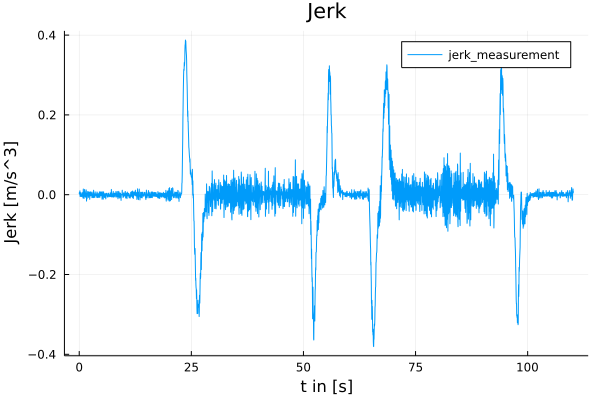

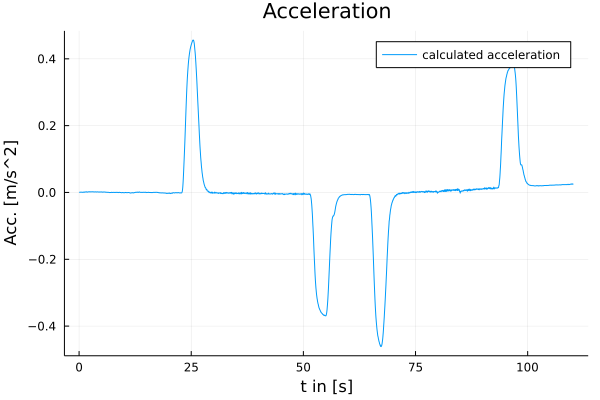

DataSeries(Accelerometer(Jerk([0.195417606, 0.233127449, 0.270837345, 0.308547189, 0.346257033, 0.383966928, 0.421676772, 0.459386616, 0.497096512, 0.534806356  …  111.8530416, 111.8907506, 111.9284596, 111.9661686, 112.0038776, 112.0415866, 112.0792956, 112.1170046, 112.1547136, 112.1924226], [0.003936767578, -0.02130126953, -0.03543758392, -0.01453399658, -0.02175998688, -0.0416021347, -0.01627349854, 0.0158662796, 0.0146818161, 0.009183883667  …  0.007238388062, -0.01111221313, -0.01482772827, -0.009363174438, -0.01321220398, 0.005534172058, 0.005135536194, 0.01370239258, 0.003876686096, 0.008093833923], "jerk_measurement"), Acceleration(nothing, nothing, ""), Velocity(nothing, nothing, ""), Position(nothing, nothing, "")), PressureSensor(Pressure([1.110390783, 2.110381356, 3.110382137, 4.110366251, 5.110386356, 6.110380314, 7.110386199, 8.110381824, 9.110379168, 10.11038448  …  102.3900408, 103.3900408, 104.3900408, 105.3900408, 106.3900408, 107.3900408, 108.3900408, 109.3900408, 1

In [97]:
include("./main.jl")
using .Main
series = 1
data = read_data_series(series)

### Plot of Raw Data

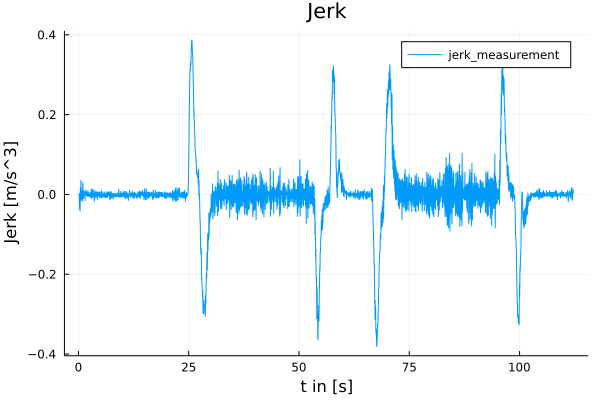

In [98]:
plot_stuff(data.accelerometer.jerk)

### Zoom in on the first 10 seconds

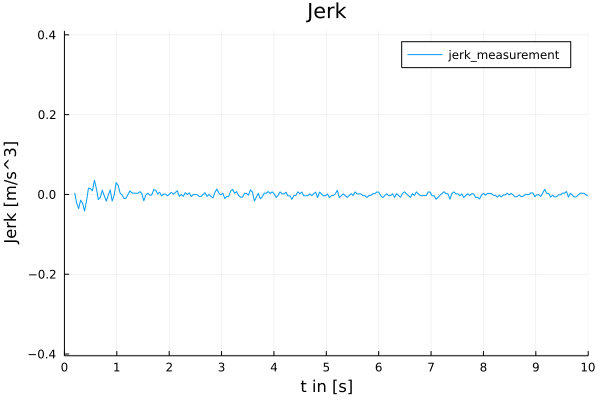

In [99]:
zoom_and_grid(0, 10)

### Cut of access data (initial shaking of the phone)

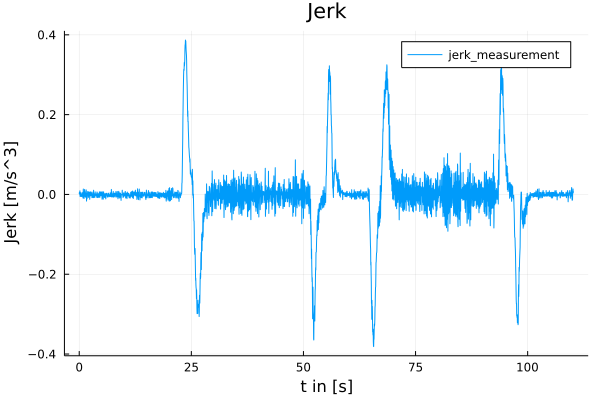

In [100]:
if series == 1
    cut(data, 0, 2)
end
plot_stuff(data.accelerometer.jerk)

### Evaluate sensor noise and apply correction

In [101]:
if series == 1
    offset = sensor_noise(data, (0, 20))
elseif series == 2
    offset = sensor_noise(data, (0, 15))
end
apply_offset(data, offset)
println("Offset: $offset")

Offset: -0.0007659243998669302


### Integrate Data to get Acceleration, Velocity and Position

In [102]:
integrate(data)

### Display Results
#### Acceleration by Accelerometer

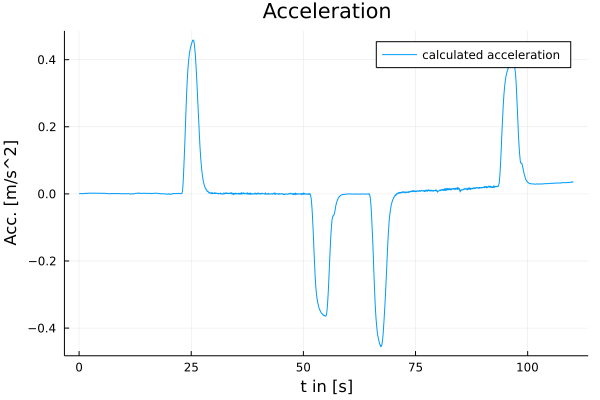

In [103]:
plot_stuff(data.accelerometer.acceleration)

#### Velocity by Accelerometer

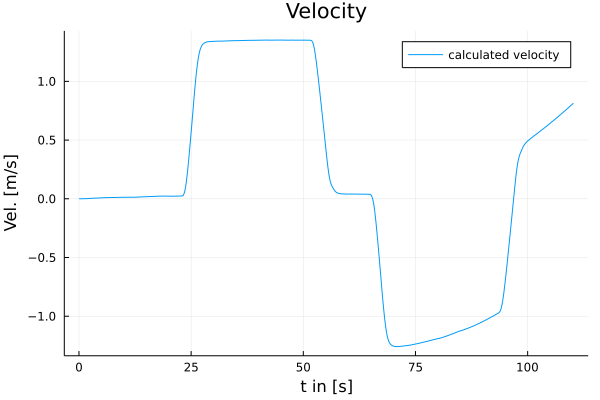

In [104]:
plot_stuff(data.accelerometer.velocity)

#### Position by Accelerometer

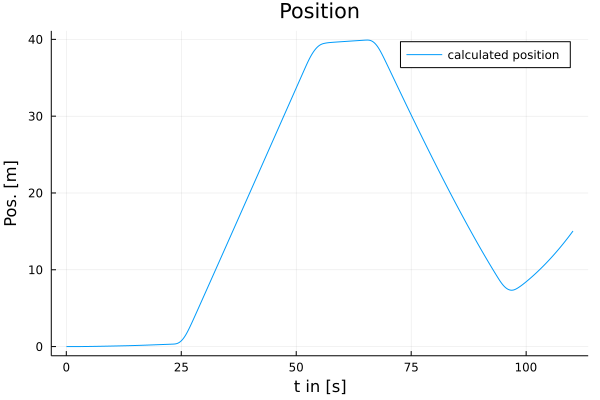

In [105]:
plot_stuff(data.accelerometer.position)

#### Pressure by Pressure Sensor

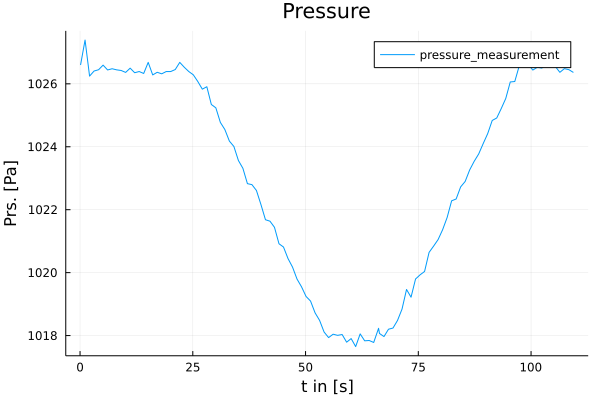

In [106]:
plot_stuff(data.pressure_sensor.pressure)

#### Velocity by Pressure Sensor

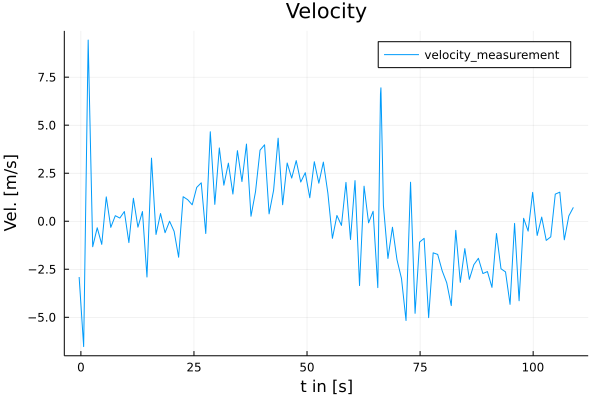

In [107]:
plot_stuff(data.pressure_sensor.velocity)

#### Position by Pressure Sensor

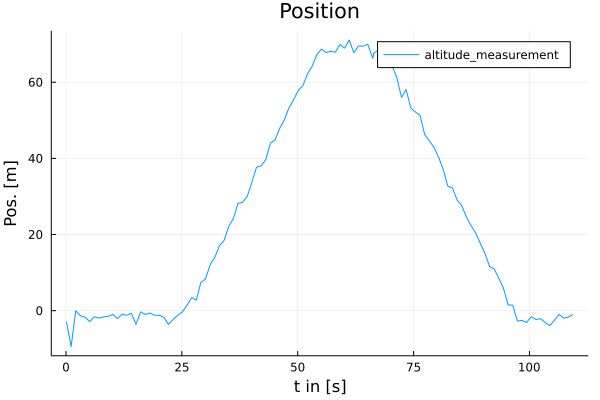

In [108]:
plot_stuff(data.pressure_sensor.position)

#### Velocity by Accelerometer and Pressure Sensor

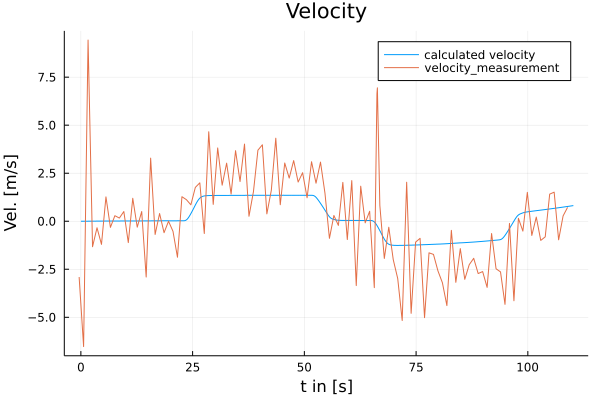

In [109]:
plot_stuff(data.accelerometer.velocity, data.pressure_sensor.velocity)

#### Position by Accelerometer and Pressure Sensor

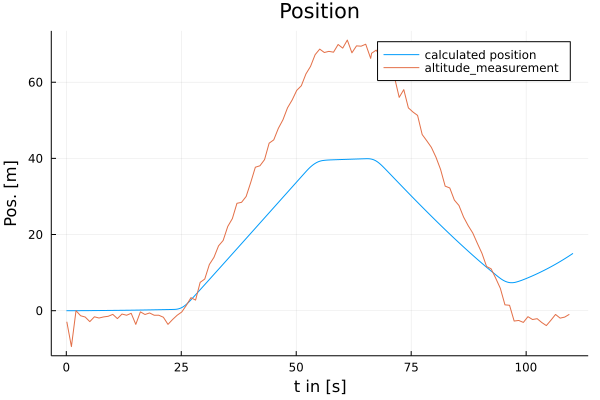

In [110]:
plot_stuff(data.accelerometer.position, data.pressure_sensor.position)

#### Acceleroemter: Jerk, Acceleration and Velocity

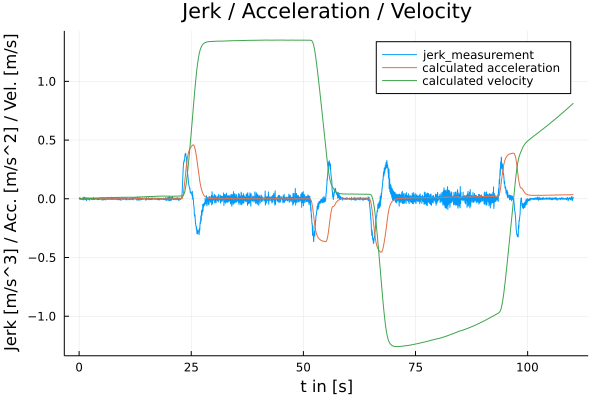

In [112]:
plot_stuff(data.accelerometer.jerk, data.accelerometer.acceleration, data.accelerometer.velocity)